In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("heart_disease.csv")

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
df.describe(include = "object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319721,319680,319774,319762,319482,319751,319756,319762,319779,319302,319795,319778,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187843,297908,307706,275363,167591,34143,245189,269626,247946,113657,276923,308001,289976


In [12]:
#Checking for missing values
df.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [13]:
#Filling missing values

df['BMI'].fillna(df['BMI'].mode()[0], inplace=True)
df['SleepTime'].fillna(df['SleepTime'].mode()[0], inplace=True)
df['AlcoholDrinking'].fillna(df['AlcoholDrinking'].mode()[0], inplace=True)
df['SkinCancer'].fillna(df['SkinCancer'].mode()[0], inplace=True)
df['Asthma'].fillna(df['Asthma'].mode()[0], inplace=True)
df['Smoking'].fillna(df['Smoking'].mode()[0],inplace=True)
df['Stroke'].fillna(df['Stroke'].mode()[0],inplace=True)
df['PhysicalHealth'].fillna(df['PhysicalHealth'].mode()[0],inplace=True)
df['MentalHealth'].fillna(df['MentalHealth'].mode()[0],inplace=True)
df['DiffWalking'].fillna(df['DiffWalking'].mode()[0],inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)
df['AgeCategory'].fillna(df['AgeCategory'].mode()[0],inplace=True)
df['Race'].fillna(df['Race'].mode()[0],inplace=True)
df['Diabetic'].fillna(df['Diabetic'].mode()[0],inplace=True)
df['PhysicalActivity'].fillna(df['PhysicalActivity'].mode()[0],inplace=True)
df['GenHealth'].fillna(df['GenHealth'].mode()[0],inplace=True)
df['KidneyDisease'].fillna(df['KidneyDisease'].mode()[0],inplace=True)

In [14]:
#Confirming that no missing values are present now

df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [15]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325317,3.371425,3.898213,7.096856
std,6.356079,7.950489,7.955158,1.435676
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


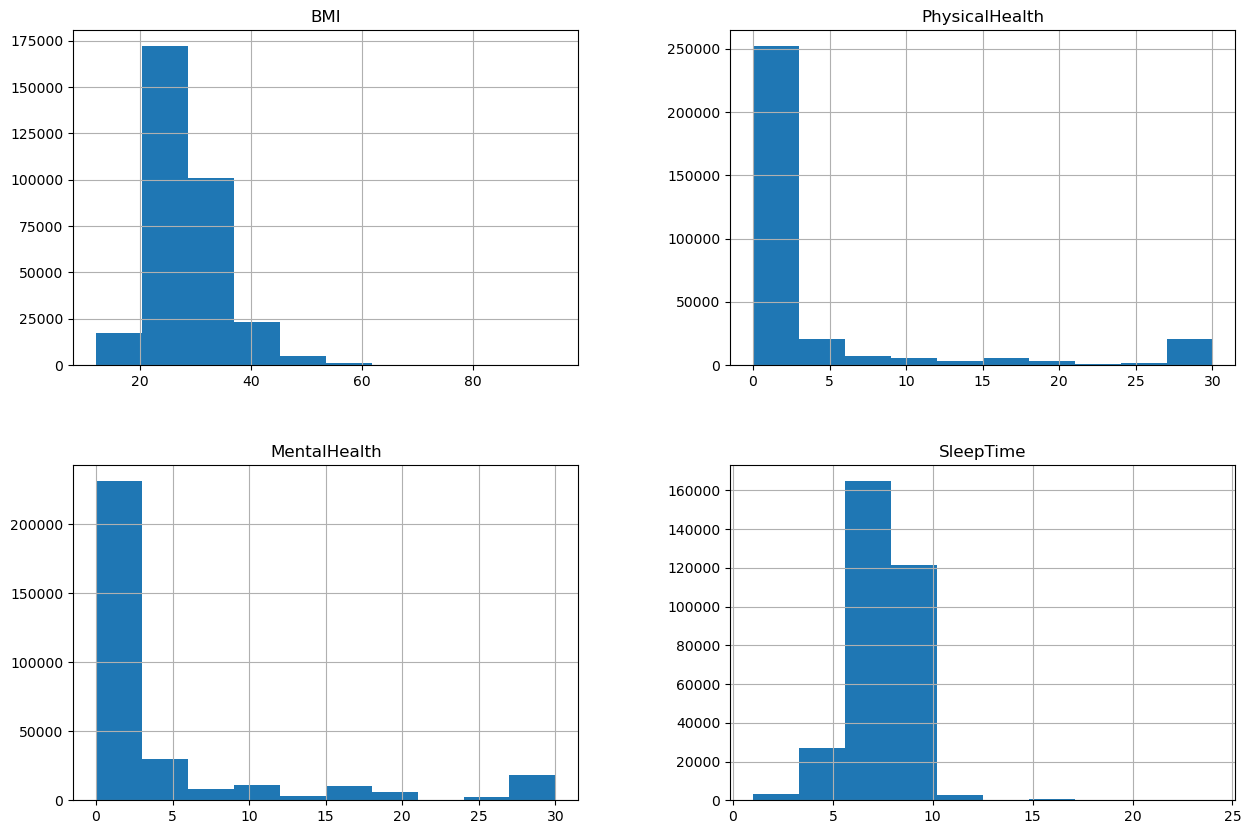

In [20]:
#Plotting histograms for numerical columns

df.hist(bins=10, figsize=(15,10))
plt.show()

In [22]:
#Encoding of categorical columns to numerical form

categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

#Initializing label encoder
encoder = LabelEncoder()

#Looping through the columns and encoding each one
for cols in categorical_cols:
    df[cols] = encoder.fit_transform(df[cols])

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


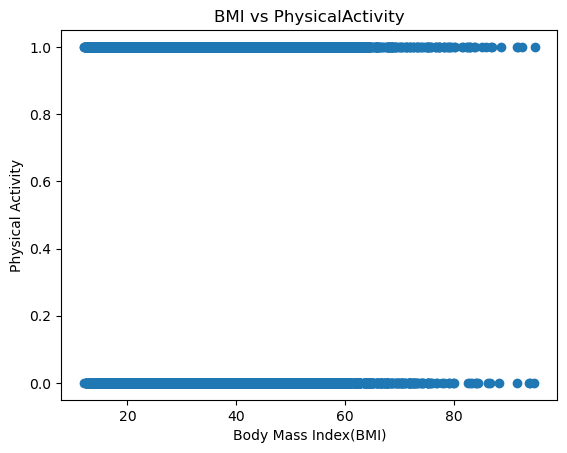

In [24]:
#Scatter plot

plt.figure()
plt.scatter(df['BMI'], df['PhysicalActivity'])
plt.title("BMI vs PhysicalActivity")
plt.xlabel("Body Mass Index(BMI)")
plt.ylabel("Physical Activity")

plt.show()

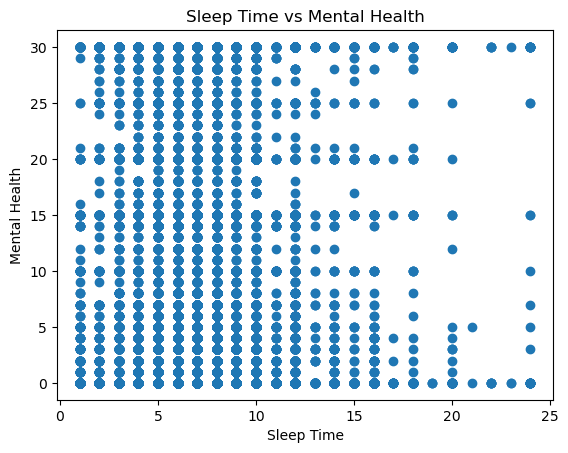

In [25]:
#Scatter plot

plt.figure()
plt.scatter(df['SleepTime'], df['MentalHealth'])
plt.title("Sleep Time vs Mental Health")
plt.xlabel("Sleep Time")
plt.ylabel("Mental Health")

plt.show()